In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anasmohammedtahir/covidqu")

print("Path to dataset files:", path)

100%|██████████| 1.15G/1.15G [00:28<00:00, 42.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install -U ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88


In [7]:
ls -R /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7 | head -n 200


/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7:
COVID-QU-Ex dataset.txt
Infection Segmentation Data/
Lung Segmentation Data/

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data:
Infection Segmentation Data/

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data:
Test/
Train/
Val/

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Test:
COVID-19/
Non-COVID/
Normal/

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19:
images/
infection masks/
lung masks/

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images:
covid_1579.png
covid_1582.png
covid_1583.png
covid_1584.png
covid_1585.png
covid_1586.png
cov

In [8]:
SRC="/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data"
DST="/content/drive/MyDrive/dtset/xray lung/raw"

In [9]:
mkdir -p "$DST"/{train,val,test}/{covid,noncovid,normal}/{images,lung_masks,infection_masks}


In [11]:
%%bash
set -e

SRC="/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data"
DST="/content/drive/MyDrive/dtset/xray lung/raw"

echo "SRC = $SRC"
echo "DST = $DST"

mkdir -p "$DST"/{train,val,test}/{covid,noncovid,normal}/{images,lung_masks,infection_masks}

copy_split () {
  SPLIT="$1"
  rsync -a "$SRC/$SPLIT/COVID-19/images/"          "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/covid/images/"
  rsync -a "$SRC/$SPLIT/COVID-19/lung masks/"      "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/covid/lung_masks/"
  rsync -a "$SRC/$SPLIT/COVID-19/infection masks/" "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/covid/infection_masks/"

  rsync -a "$SRC/$SPLIT/Non-COVID/images/"          "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/noncovid/images/"
  rsync -a "$SRC/$SPLIT/Non-COVID/lung masks/"      "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/noncovid/lung_masks/"
  rsync -a "$SRC/$SPLIT/Non-COVID/infection masks/" "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/noncovid/infection_masks/"

  rsync -a "$SRC/$SPLIT/Normal/images/"          "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/normal/images/"
  rsync -a "$SRC/$SPLIT/Normal/lung masks/"      "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/normal/lung_masks/"

  rsync -a "$SRC/$SPLIT/Normal/infection masks/" "$DST/$(echo "$SPLIT" | tr '[:upper:]' '[:lower:]')/normal/infection_masks/" 2>/dev/null || true
}

copy_split "Train"
copy_split "Val"
copy_split "Test"

echo "Done copying."

echo "Image counts:"
for sp in train val test; do
  for cls in covid noncovid normal; do
    c=$(find "$DST/$sp/$cls/images" -type f | wc -l)
    echo "  $sp/$cls: $c"
  done
done


SRC = /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data
DST = /content/drive/MyDrive/dtset/xray lung/raw
Done copying.
Image counts:
  train/covid: 1864
  train/noncovid: 932
  train/normal: 932
  val/covid: 466
  val/noncovid: 233
  val/normal: 233
  test/covid: 583
  test/noncovid: 292
  test/normal: 291


In [12]:
!ls "/content/drive/MyDrive/dtset/xray lung/raw/test/covid/images" | head
!ls "/content/drive/MyDrive/dtset/xray lung/raw/test/covid/lung_masks" | head
!ls "/content/drive/MyDrive/dtset/xray lung/raw/test/covid/infection_masks" | head

covid_1579.png
covid_1582.png
covid_1583.png
covid_1584.png
covid_1585.png
covid_1586.png
covid_1587.png
covid_1590.png
covid_1591.png
covid_1592.png
covid_1579.png
covid_1582.png
covid_1583.png
covid_1584.png
covid_1585.png
covid_1586.png
covid_1587.png
covid_1590.png
covid_1591.png
covid_1592.png
covid_1579.png
covid_1582.png
covid_1583.png
covid_1584.png
covid_1585.png
covid_1586.png
covid_1587.png
covid_1590.png
covid_1591.png
covid_1592.png


In [27]:
import os, shutil, random
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
RAW_ROOT  = Path("/content/drive/MyDrive/dtset/xray lung/raw")
YOLO_ROOT = Path("/content/drive/MyDrive/dtset/xray lung/yolo")

In [15]:
NAMES = {0: "lung", 1: "covid_infection", 2: "noncovid_infection"}

In [16]:
def binarize_mask(mask):
    if mask is None:
        return None
    if mask.ndim == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    return (mask > 127).astype(np.uint8)

def mask_to_polygons_no_knobs(mask01):

    if mask01 is None:
        return []
    mask255 = (mask01 * 255).astype(np.uint8)

    contours, _ = cv2.findContours(mask255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polys = []
    for c in contours:
        c = c.squeeze(1)
        if c.ndim != 2 or c.shape[0] < 3:
            continue
        polys.append(c.astype(np.float32))
    return polys

def write_yolo_seg_label(txt_path, objects, w, h):

    txt_path.parent.mkdir(parents=True, exist_ok=True)
    with open(txt_path, "w") as f:
        for cls, poly in objects:
            pts = poly.copy()
            pts[:, 0] = np.clip(pts[:, 0] / w, 0, 1)
            pts[:, 1] = np.clip(pts[:, 1] / h, 0, 1)
            flat = pts.reshape(-1)
            if flat.size < 6:
                continue
            f.write(str(cls) + " " + " ".join(f"{v:.6f}" for v in flat.tolist()) + "\n")

def find_mask_file(mask_dir: Path, stem: str):
    for ext in [".png", ".jpg", ".jpeg", ".PNG", ".JPG", ".JPEG"]:
        p = mask_dir / f"{stem}{ext}"
        if p.exists():
            return p
    hits = list(mask_dir.glob(stem + ".*"))
    return hits[0] if hits else None

def ensure_dirs():
    for sp in ["train", "val", "test"]:
        (YOLO_ROOT / "images" / sp).mkdir(parents=True, exist_ok=True)
        (YOLO_ROOT / "labels" / sp).mkdir(parents=True, exist_ok=True)

def convert_split(split: str):
    for cls_name in ["covid", "noncovid", "normal"]:
        img_dir  = RAW_ROOT / split / cls_name / "images"
        lung_dir = RAW_ROOT / split / cls_name / "lung_masks"
        inf_dir  = RAW_ROOT / split / cls_name / "infection_masks"

        if not img_dir.exists():
            print(f"[WARN] Missing: {img_dir}")
            continue

        out_img_dir = YOLO_ROOT / "images" / split
        out_lbl_dir = YOLO_ROOT / "labels" / split

        img_files = sorted([p for p in img_dir.iterdir() if p.suffix.lower() in [".png", ".jpg", ".jpeg"]])
        print(f"{split}/{cls_name}: {len(img_files)} images")

        for img_path in img_files:
            stem = img_path.stem
            out_stem = f"{split}_{cls_name}_{stem}"

            out_img_path = out_img_dir / f"{out_stem}{img_path.suffix.lower()}"
            shutil.copy2(img_path, out_img_path)

            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"[WARN] Cannot read image: {img_path}")
                continue
            h, w = img.shape[:2]

            lung_mask_path = find_mask_file(lung_dir, stem)
            if lung_mask_path is None:
                print(f"[WARN] Missing lung mask for {img_path.name} in {lung_dir}")
                continue
            lung = cv2.imread(str(lung_mask_path), cv2.IMREAD_UNCHANGED)
            lung01 = binarize_mask(lung)

            objects = []
            for poly in mask_to_polygons_no_knobs(lung01):
                objects.append((0, poly))

            if cls_name in ["covid", "noncovid"]:
                inf_mask_path = find_mask_file(inf_dir, stem)
                if inf_mask_path is not None:
                    inf = cv2.imread(str(inf_mask_path), cv2.IMREAD_UNCHANGED)
                    inf01 = binarize_mask(inf)
                    if inf01 is not None:
                        inf01 = (inf01 & lung01).astype(np.uint8)
                        inf_cls_id = 1 if cls_name == "covid" else 2
                        for poly in mask_to_polygons_no_knobs(inf01):
                            objects.append((inf_cls_id, poly))

            out_txt_path = out_lbl_dir / f"{out_stem}.txt"
            write_yolo_seg_label(out_txt_path, objects, w, h)

In [17]:
ensure_dirs()
for sp in ["train", "val", "test"]:
    convert_split(sp)

yaml_path = YOLO_ROOT / "data.yaml"
with open(yaml_path, "w") as f:
    f.write(f"path: {YOLO_ROOT}\n")
    f.write("train: images/train\n")
    f.write("val: images/val\n")
    f.write("test: images/test\n\n")
    f.write("names:\n")
    for k in sorted(NAMES):
        f.write(f"  {k}: {NAMES[k]}\n")

print("\nYOLO:", YOLO_ROOT)
print("yaml:", yaml_path)

train/covid: 1864 images
train/noncovid: 932 images
train/normal: 932 images
val/covid: 466 images
val/noncovid: 233 images
val/normal: 233 images
test/covid: 583 images
test/noncovid: 292 images
test/normal: 291 images

YOLO: /content/drive/MyDrive/dtset/xray lung/yolo
yaml: /content/drive/MyDrive/dtset/xray lung/yolo/data.yaml


In [18]:
!ls "/content/drive/MyDrive/dtset/xray lung/yolo/images/train" | head
!ls "/content/drive/MyDrive/dtset/xray lung/yolo/labels/train" | head
!head -n 20 "/content/drive/MyDrive/dtset/xray lung/yolo/labels/train/$(ls /content/drive/MyDrive/dtset/xray\ lung/yolo/labels/train | head -n 1)"

train_covid_covid_1000.png
train_covid_covid_1001.png
train_covid_covid_1002.png
train_covid_covid_1007.png
train_covid_covid_1008.png
train_covid_covid_1009.png
train_covid_covid_100.png
train_covid_covid_1010.png
train_covid_covid_1011.png
train_covid_covid_1014.png
train_covid_covid_1000.txt
train_covid_covid_1001.txt
train_covid_covid_1002.txt
train_covid_covid_1007.txt
train_covid_covid_1008.txt
train_covid_covid_1009.txt
train_covid_covid_100.txt
train_covid_covid_1010.txt
train_covid_covid_1011.txt
train_covid_covid_1014.txt
0 0.343750 0.082031 0.339844 0.085938 0.328125 0.085938 0.324219 0.089844 0.320312 0.089844 0.316406 0.093750 0.308594 0.093750 0.304688 0.097656 0.300781 0.097656 0.253906 0.144531 0.253906 0.148438 0.242188 0.160156 0.242188 0.164062 0.234375 0.171875 0.234375 0.175781 0.226562 0.183594 0.226562 0.187500 0.222656 0.191406 0.222656 0.195312 0.214844 0.203125 0.214844 0.207031 0.210938 0.210938 0.210938 0.214844 0.203125 0.222656 0.203125 0.226562 0.199219 0

In [19]:
from pathlib import Path

lbl_dir = Path("/content/drive/MyDrive/dtset/xray lung/yolo/labels/train")
sample = next(lbl_dir.glob("*.txt"))

print("Sample label file:", sample.name)
print(sample.read_text()[:500])


Sample label file: train_covid_covid_1.txt
0 0.390625 0.183594 0.386719 0.187500 0.378906 0.187500 0.375000 0.191406 0.371094 0.191406 0.367188 0.195312 0.363281 0.195312 0.351562 0.207031 0.347656 0.207031 0.335938 0.218750 0.332031 0.218750 0.289062 0.261719 0.289062 0.265625 0.285156 0.269531 0.285156 0.273438 0.277344 0.281250 0.277344 0.285156 0.269531 0.292969 0.269531 0.296875 0.261719 0.304688 0.261719 0.308594 0.257812 0.312500 0.257812 0.316406 0.253906 0.320312 0.253906 0.324219 0.250000 0.328125 0.250000 0.332031 0.246094 0.3


In [20]:
RAW_ROOT = Path("/content/drive/MyDrive/dtset/xray lung/raw")

In [21]:
def read_gray(p):
    im = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
    if im is None:
        raise FileNotFoundError(p)
    return im

def find_matching_mask(mask_dir: Path, stem: str):
    for ext in [".png", ".jpg", ".jpeg", ".PNG", ".JPG", ".JPEG"]:
        p = mask_dir / f"{stem}{ext}"
        if p.exists():
            return p
    hits = list(mask_dir.glob(stem + ".*"))
    return hits[0] if hits else None

In [22]:
split = "train"
cls_name = random.choice(["covid", "noncovid"])
img_dir  = RAW_ROOT / split / cls_name / "images"
lung_dir = RAW_ROOT / split / cls_name / "lung_masks"
inf_dir  = RAW_ROOT / split / cls_name / "infection_masks"

img_paths = sorted([p for p in img_dir.iterdir() if p.suffix.lower() in [".png",".jpg",".jpeg"]])

In [23]:
for _ in range(200):
    img_path = random.choice(img_paths)
    stem = img_path.stem
    lung_path = find_matching_mask(lung_dir, stem)
    inf_path  = find_matching_mask(inf_dir, stem)
    if lung_path and inf_path:
        break
else:
    raise RuntimeError("Could not find a sample with both lung and infection masks.")

In [24]:
img  = read_gray(img_path)
lung = read_gray(lung_path)
inf  = read_gray(inf_path)

lung01 = (lung > 127).astype(np.uint8)
inf01  = (inf  > 127).astype(np.uint8)

In [25]:
inf01_clipped = (inf01 & lung01).astype(np.uint8)

# overlay
overlay = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# lung in green
overlay[lung01 == 1] = (overlay[lung01 == 1] * 0.5 + np.array([0,255,0]) * 0.5).astype(np.uint8)
# infection in red
overlay[inf01_clipped == 1] = (overlay[inf01_clipped == 1] * 0.3 + np.array([255,0,0]) * 0.7).astype(np.uint8)


Class: covid | Image: covid_614.png


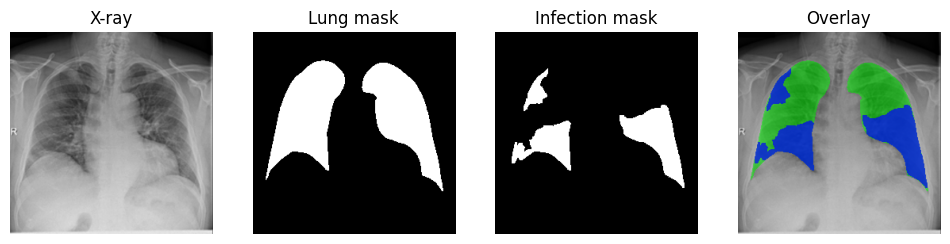

In [28]:
print("Class:", cls_name, "| Image:", img_path.name)

plt.figure(figsize=(12,3))
plt.subplot(1,4,1); plt.title("X-ray"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(1,4,2); plt.title("Lung mask"); plt.imshow(lung01, cmap="gray"); plt.axis("off")
plt.subplot(1,4,3); plt.title("Infection mask"); plt.imshow(inf01_clipped, cmap="gray"); plt.axis("off")
plt.subplot(1,4,4); plt.title("Overlay"); plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.show()

In [29]:
from ultralytics import YOLO

DATA_YAML = "/content/drive/MyDrive/dtset/xray lung/yolo/data.yaml"

model = YOLO("yolo11s-seg.pt")
model.train(
    data=DATA_YAML,
    task="segment",
    epochs=50,
    imgsz=256,
    batch=32,
    device=0,
    workers=8,
    cache=True,
    amp=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dtset/xray lung/yolo/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fefe8a3fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

Split=train | Class=noncovid | Image=non_COVID (594).png
Lung contours: 2 | Infection contours (clipped): 0


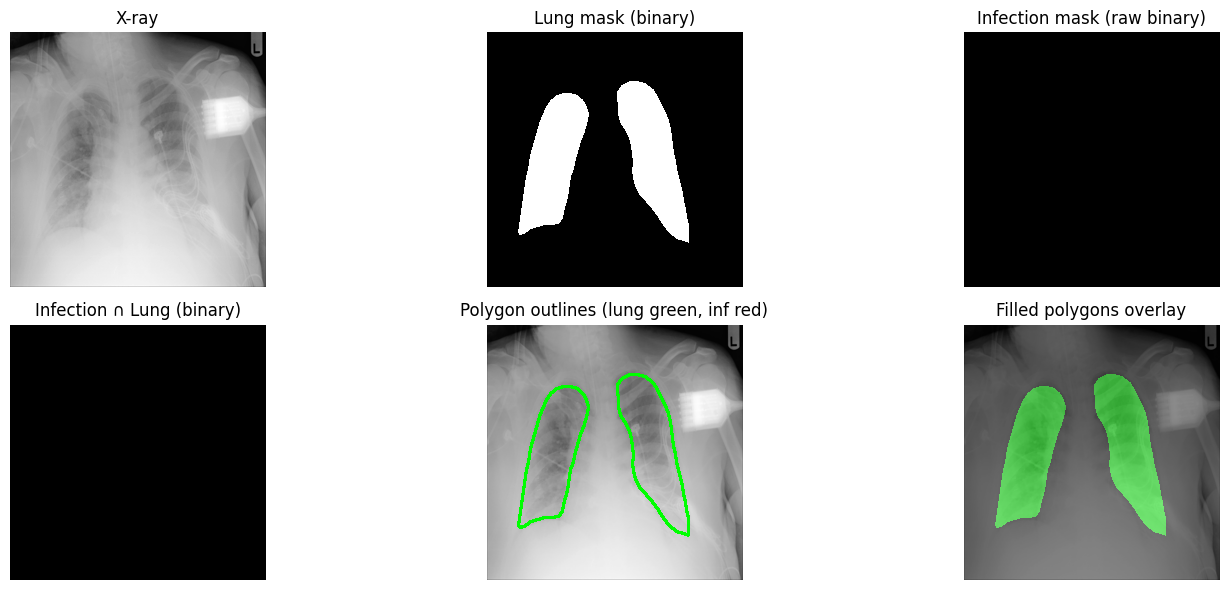

In [30]:
import random
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

RAW_ROOT = Path("/content/drive/MyDrive/dtset/xray lung/raw")

def read_gray(p):
    im = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
    if im is None:
        raise FileNotFoundError(p)
    return im

def find_matching_mask(mask_dir: Path, stem: str):
    for ext in [".png", ".jpg", ".jpeg", ".PNG", ".JPG", ".JPEG"]:
        p = mask_dir / f"{stem}{ext}"
        if p.exists():
            return p
    hits = list(mask_dir.glob(stem + ".*"))
    return hits[0] if hits else None

def mask01_from_path(p):
    m = read_gray(p)
    return (m > 127).astype(np.uint8)

def contours_from_mask01(mask01):
    mask255 = (mask01 * 255).astype(np.uint8)
    contours, _ = cv2.findContours(mask255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # each contour is Nx1x2 -> keep as-is for drawContours/fillPoly
    return contours

# pick an infected sample (covid or noncovid)
split = "train"
cls_name = random.choice(["covid", "noncovid"])

img_dir  = RAW_ROOT / split / cls_name / "images"
lung_dir = RAW_ROOT / split / cls_name / "lung_masks"
inf_dir  = RAW_ROOT / split / cls_name / "infection_masks"

img_paths = sorted([p for p in img_dir.iterdir() if p.suffix.lower() in [".png",".jpg",".jpeg"]])

for _ in range(300):
    img_path = random.choice(img_paths)
    stem = img_path.stem
    lung_path = find_matching_mask(lung_dir, stem)
    inf_path  = find_matching_mask(inf_dir, stem)
    if lung_path and inf_path:
        break
else:
    raise RuntimeError("Could not find a sample with both lung and infection masks.")

# load
img = read_gray(img_path)
lung01 = mask01_from_path(lung_path)
inf01  = mask01_from_path(inf_path)

# clip infection by lung
inf01_clip = (inf01 & lung01).astype(np.uint8)

# extract polygons (contours)
lung_contours = contours_from_mask01(lung01)
inf_contours  = contours_from_mask01(inf01_clip)

# create visuals
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# (A) outlines
poly_outline = img_bgr.copy()
cv2.drawContours(poly_outline, lung_contours, -1, (0,255,0), 2)   # green
cv2.drawContours(poly_outline, inf_contours,  -1, (0,0,255), 2)   # red (BGR)

# (B) filled polygons on blank canvas
filled = np.zeros_like(img_bgr)
cv2.drawContours(filled, lung_contours, -1, (0,255,0), thickness=cv2.FILLED)
cv2.drawContours(filled, inf_contours,  -1, (0,0,255), thickness=cv2.FILLED)

# (C) filled polygons overlayed on image
filled_overlay = img_bgr.copy()
alpha = 0.45
filled_overlay = (filled_overlay*(1-alpha) + filled*alpha).astype(np.uint8)

print(f"Split={split} | Class={cls_name} | Image={img_path.name}")
print(f"Lung contours: {len(lung_contours)} | Infection contours (clipped): {len(inf_contours)}")

plt.figure(figsize=(16,6))
plt.subplot(2,3,1); plt.title("X-ray"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(2,3,2); plt.title("Lung mask (binary)"); plt.imshow(lung01, cmap="gray"); plt.axis("off")
plt.subplot(2,3,3); plt.title("Infection mask (raw binary)"); plt.imshow(inf01, cmap="gray"); plt.axis("off")

plt.subplot(2,3,4); plt.title("Infection ∩ Lung (binary)"); plt.imshow(inf01_clip, cmap="gray"); plt.axis("off")
plt.subplot(2,3,5); plt.title("Polygon outlines (lung green, inf red)");
plt.imshow(cv2.cvtColor(poly_outline, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(2,3,6); plt.title("Filled polygons overlay");
plt.imshow(cv2.cvtColor(filled_overlay, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.tight_layout()
plt.show()


=== SAMPLE YOLO POLYGON LABELS ===
Label file: train_normal_Normal (1933).txt
Num objects in label: 2

First 3 objects (each line is one polygon):
[0] 0 0.523438 0.128906 0.519531 0.132812 0.515625 0.132812 0.507812 0.140625 0.503906 0.140625 0.492188 0.152344 0.492188 0.156250 0.488281 0.160156 0.488281 0.167...
[1] 0 0.308594 0.105469 0.304688 0.109375 0.300781 0.109375 0.296875 0.113281 0.289062 0.113281 0.285156 0.117188 0.277344 0.117188 0.273438 0.121094 0.269531 0.121...


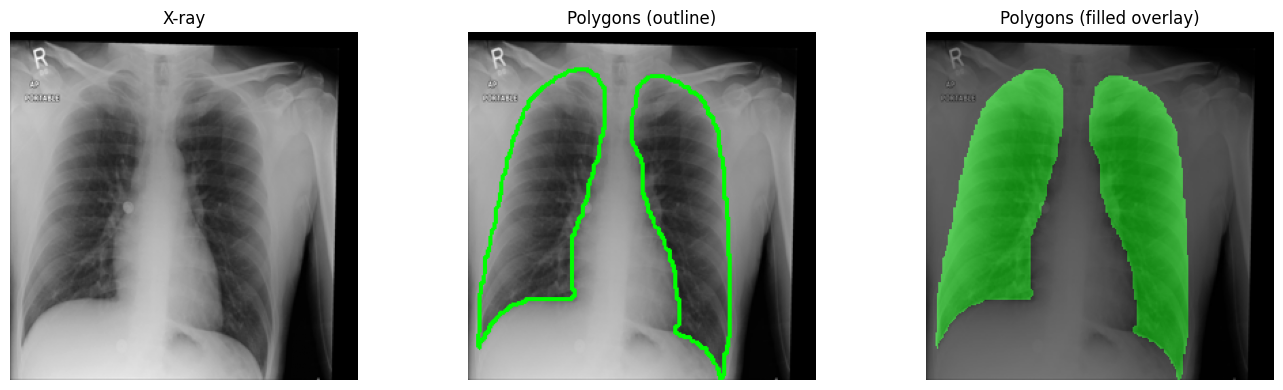

weight: /content/runs/segment/train/weights/best.pt


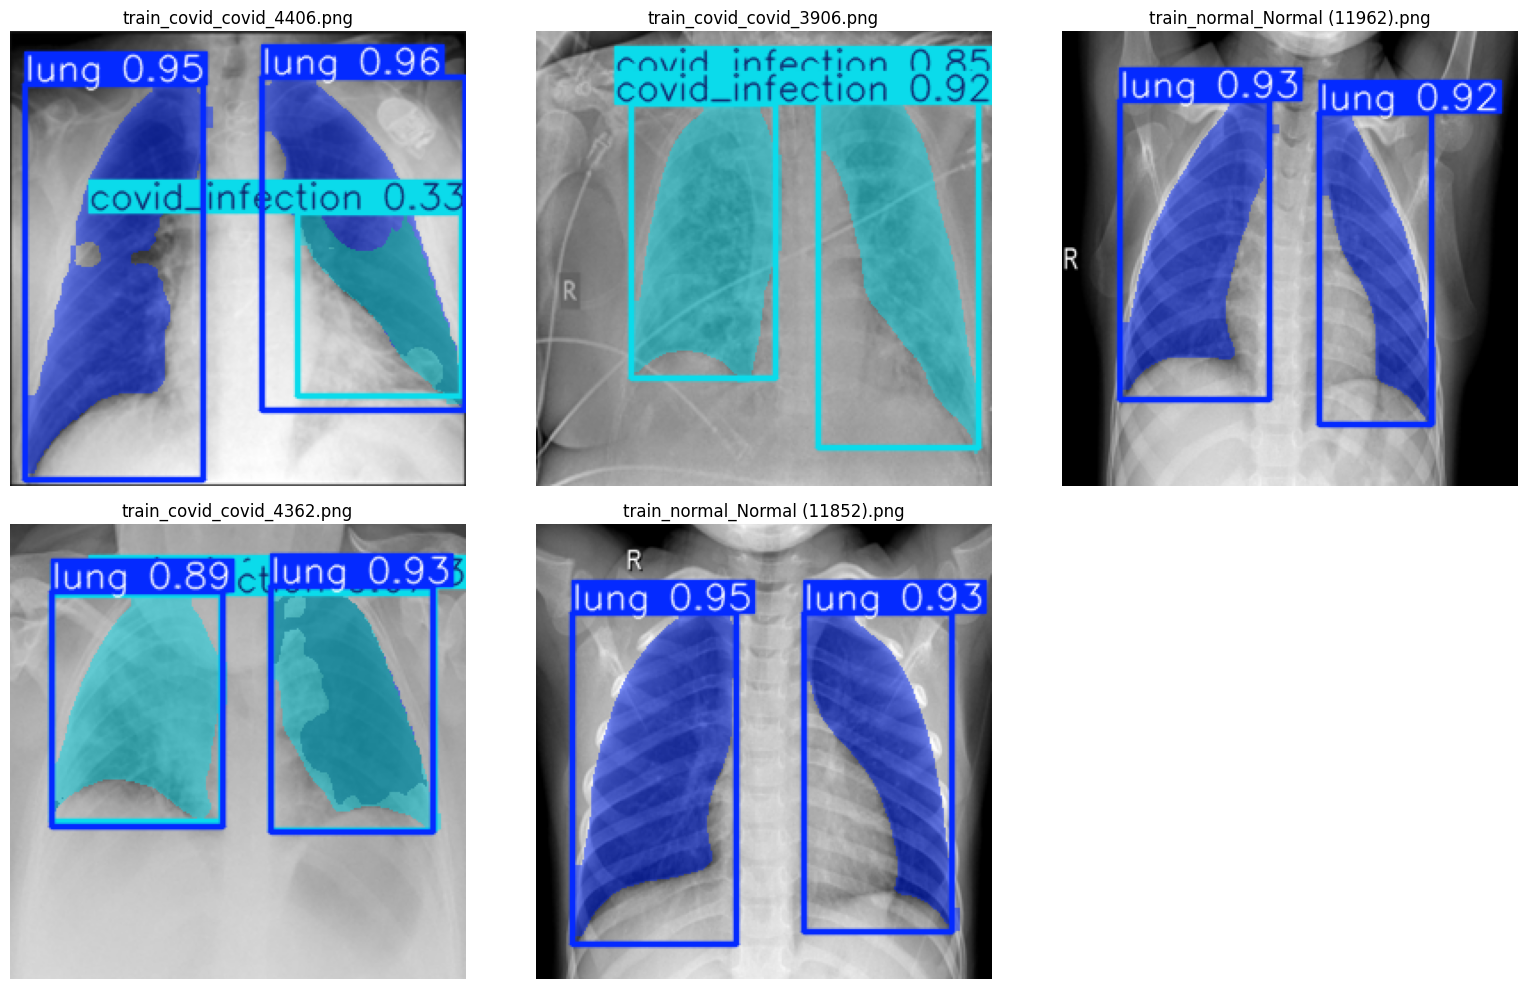

In [31]:
from ultralytics import YOLO

YOLO_ROOT = Path("/content/drive/MyDrive/dtset/xray lung/yolo")
DATA_YAML = YOLO_ROOT / "data.yaml"
label_dir = YOLO_ROOT / "labels" / "train"
img_dir   = YOLO_ROOT / "images" / "train"

label_files = sorted(label_dir.glob("*.txt"))
assert len(label_files) > 0, f"No label files found in {label_dir}"

sample_lbl = random.choice(label_files)
sample_stem = sample_lbl.stem

img_candidates = list(img_dir.glob(sample_stem + ".*"))
assert len(img_candidates) > 0, f"No matching image found for {sample_stem} in {img_dir}"
sample_img = img_candidates[0]

print("=== SAMPLE YOLO POLYGON LABELS ===")
print("Label file:", sample_lbl.name)
lines = sample_lbl.read_text().strip().splitlines()
print("Num objects in label:", len(lines))
print("\nFirst 3 objects (each line is one polygon):")
for i, ln in enumerate(lines[:3]):
    print(f"[{i}] {ln[:160]}{'...' if len(ln) > 160 else ''}")


def parse_yolo_poly_line(line):
    parts = line.strip().split()
    cls = int(parts[0])
    coords = np.array(list(map(float, parts[1:])), dtype=np.float32).reshape(-1, 2)
    return cls, coords

img = cv2.imread(str(sample_img), cv2.IMREAD_GRAYSCALE)
h, w = img.shape[:2]
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

outline = img_bgr.copy()
filled  = np.zeros_like(img_bgr)

colors = {0: (0,255,0), 1: (0,0,255), 2: (255,0,0)}

for ln in lines:
    cls, xy = parse_yolo_poly_line(ln)
    pts = xy.copy()
    pts[:,0] *= w
    pts[:,1] *= h
    pts = np.clip(pts, [0,0], [w-1,h-1]).astype(np.int32)
    pts = pts.reshape(-1,1,2)
    cv2.polylines(outline, [pts], isClosed=True, color=colors.get(cls,(255,255,255)), thickness=2)
    cv2.fillPoly(filled, [pts], color=colors.get(cls,(255,255,255)))

alpha = 0.45
filled_overlay = (img_bgr*(1-alpha) + filled*alpha).astype(np.uint8)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.title("X-ray"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title("Polygons (outline)"); plt.imshow(cv2.cvtColor(outline, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(1,3,3); plt.title("Polygons (filled overlay)"); plt.imshow(cv2.cvtColor(filled_overlay, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.tight_layout()
plt.show()


def find_trained_weights():
    candidates = [
        Path("/content/runs/segment/train/weights/best.pt"),
        Path("/content/runs/segment/train/weights/last.pt"),
        Path("/content/drive/MyDrive/runs/segment/train/weights/best.pt"),
        Path("/content/drive/MyDrive/runs/segment/train/weights/last.pt"),
    ]
    drive_root = Path("/content/drive/MyDrive")
    extra = list(drive_root.glob("**/runs/segment/**/weights/best.pt"))
    extra += list(drive_root.glob("**/runs/segment/**/weights/last.pt"))
    for p in candidates + extra:
        if p.exists():
            return p
    return None

weights = find_trained_weights()
if weights is None:
    print("nah")
    weights = "yolo11s-seg.pt"
else:
    print("weight:", weights)

model = YOLO(str(weights))

all_imgs = sorted([p for p in img_dir.iterdir() if p.suffix.lower() in [".png",".jpg",".jpeg"]])
samples = random.sample(all_imgs, k=min(5, len(all_imgs)))

results = model.predict(source=[str(p) for p in samples], imgsz=256, conf=0.25, device=0, verbose=False)

plt.figure(figsize=(16,10))
for i, r in enumerate(results):
    vis = r.plot()
    vis_rgb = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)

    plt.subplot(2,3,i+1)
    plt.imshow(vis_rgb)
    plt.title(samples[i].name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [32]:
import shutil
from pathlib import Path

source_dir = Path("/content/runs")
dest_dir = Path("/content/drive/MyDrive/dtset/xray lung") / "runs"

dest_dir.parent.mkdir(parents=True, exist_ok=True)
shutil.copytree(source_dir, dest_dir, dirs_exist_ok=True)

print(f"Successfully copied {source_dir} to {dest_dir}")

Successfully copied /content/runs to /content/drive/MyDrive/dtset/xray lung/runs


In [37]:
metrics = model.val(
    data=str(YOLO_ROOT / "data.yaml"),
    imgsz=256,
    split=SPLIT,
    device=0
)
print(metrics)


Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
YOLO11s-seg summary (fused): 114 layers, 10,067,977 parameters, 0 gradients, 32.8 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 15.0±8.8 MB/s, size: 25.6 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1g0OE46q7gBVsbvBxycm80hDZAg7uoq62/dtset/xray lung/yolo/labels/val.cache... 932 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 932/932 325.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 59/59 5.7it/s 10.3s
                   all        932       2795      0.905      0.839      0.889       0.75      0.783      0.722      0.779      0.576
                  lung        932       1864      0.995          1      0.995      0.963      0.763      0.767      0.785       0.65
       covid_infection        466        931      0.815      0.679      0.783      0.537   